<a href="https://colab.research.google.com/github/cool60334/111-TibaMe-AI-03-Machine-Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

記得放train.csv, test.csv

In [1]:
import pandas as pd

In [2]:
traindf = pd.read_csv("train.csv", encoding="utf-8")
# traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
testdf = pd.read_csv("test.csv", encoding="utf-8")
# testdf

In [4]:
traindf.isna().sum()  # isna() -> 查看空欄位(以T，F呈現) .sum() -> 計算T的總和

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 補數值欄位的缺失值
med = traindf.median()  # 全部數值欄位取中位數
traindf = traindf.fillna(med)  # 以中位數填滿空欄位
traindf.isna().sum()

<ipython-input-5-8a26d9cd3a67>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = traindf.median()  # 全部數值欄位取中位數


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 用訓練資料的中位數來填補測試資料的空缺
testdf = testdf.fillna(med)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [7]:
# 補類型欄位的缺失值
most = traindf["Embarked"].value_counts().idxmax()  # value_counts() -> 計算每個特徵的數量 idxmax() -> 選擇最多的特徵

traindf["Embarked"] = traindf["Embarked"].fillna(most)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
# 用訓練資料的最多特徵來填補測試資料的空缺
testdf["Embarked"] = testdf["Embarked"].fillna(most)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# pd.get_dummies -> 將類別特徵轉換成One-Hot Encoding
dummy = pd.get_dummies(traindf["Embarked"])

# pd.concat([表1, 表2, ...], axis=1) -> 將數個表格串接起來, axis=1 表示在後面新增直行
traindf = pd.concat([traindf, dummy], axis=1)
# traindf

In [ ]:
# pd.get_dummies -> 將類別特徵轉換成One-Hot Encoding
dummy = pd.get_dummies(testdf["Embarked"])

# pd.concat([表1, 表2, ...], axis=1) -> 將數個表格串接起來, axis=1 表示在後面新增直行
testdf = pd.concat([testdf, dummy], axis=1)
# testdf

In [11]:
dummy = pd.get_dummies(traindf["Sex"])
traindf = pd.concat([traindf, dummy], axis=1)

dummy = pd.get_dummies(testdf["Sex"])
testdf = pd.concat([testdf, dummy], axis=1)

In [ ]:
# mid = "Braund, Mr. Owen Harris".split(",")[-1].split(".")[0]
# mid = mid.replace(" ", "")  # 去除Mr前面的空白
# mid

In [12]:
def nameflow(s):
  mid = s.split(",")[-1].split(".")[0]
  mid = mid.replace(" ", "")  # 去除Mr前面的空白
  if mid == "Miss":
    return "Miss"
  elif mid == "Mr":
    return "Mr"
  elif mid == "Mrs":
    return "Mrs"
  else:
    return "Throw"


# apply() -> ()內代入函式，可一次處理所有欄位
name = traindf["Name"].apply(nameflow)
dummy = pd.get_dummies(name)
traindf = pd.concat([traindf, dummy], axis=1)
traindf

# crosstab -> 可將兩個欄位合併檢視 T -> 將表格轉向
# pd.crosstab(name, traindf["Survived"]).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,0,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,0,0,1,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,S,0,0,1,1,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,1,0,0,0,1,0,1,0,0


In [ ]:
name = testdf["Name"].apply(nameflow)
dummy = pd.get_dummies(name)
testdf = pd.concat([testdf, dummy], axis=1)
# testdf

In [14]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'female',
       'male', 'Miss', 'Mr', 'Mrs', 'Throw'],
      dtype='object')

In [20]:
# drop -> 丟掉不要的直行

traindf = traindf.drop(['PassengerId', 'Name', 'Sex',
            'Ticket', 'Cabin', 'Embarked', 'Throw'], axis=1)
testdf = testdf.drop(['Name', 'Sex','Ticket',
            'Cabin', 'Embarked', 'Throw'], axis=1)

# traindf

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

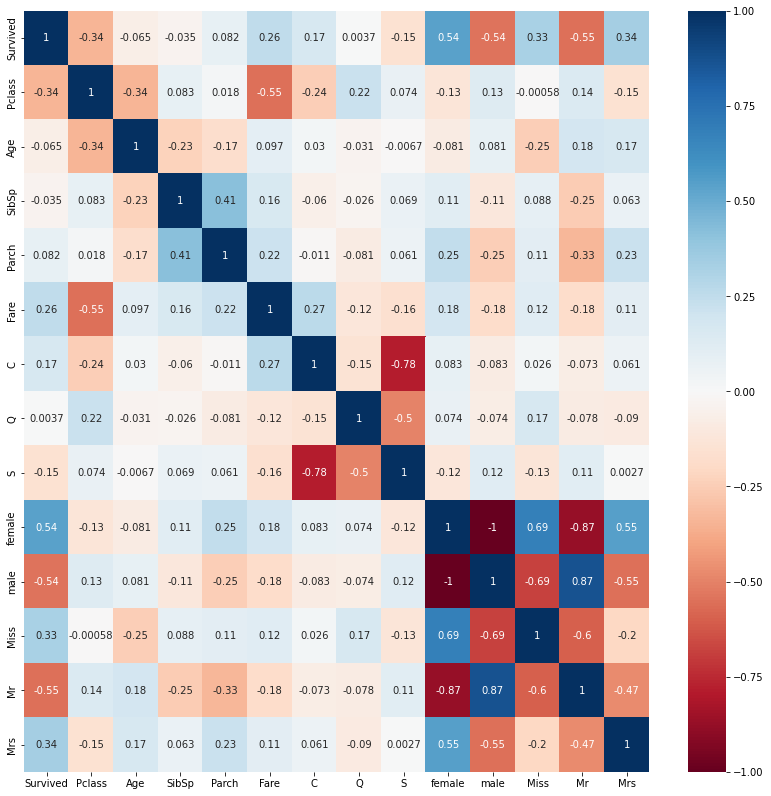

In [22]:
plt.figure(figsize = (14, 14))  # 調整圖表尺寸
sns.heatmap(traindf.corr(), annot = True, cmap = "RdBu")  # 熱度圖， annot = True -> 顯示圖上的數值， cmap = "RdBu" -> 圖表配色

In [23]:
trainx = traindf.drop(["Survived"], axis=1)  # 準備訓練用特徵
trainy = traindf["Survived"]  # 準備訓練用答案 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
clf = RandomForestClassifier(max_depth=5, n_estimators=20)  # 設置隨機森林模型
np.average(cross_val_score(clf, trainx, trainy, cv=10))  # 交叉驗證

0.8226716604244695

In [29]:
from sklearn.model_selection import GridSearchCV  # 測試每個參數

# 設定要測試的參數及測試範圍
p = {
    "max_depth": range(5, 11),
    "n_estimators": range(20, 30)
}

clf = RandomForestClassifier()  # 設置隨機森林模型

s = GridSearchCV(clf, p, cv=10)  # 測試每個參數
s.fit(trainx, trainy)  # 訓練模型
print(s.best_params_)  # 最好的參數
print(s.best_score_)  # 最好的分數

{'max_depth': 8, 'n_estimators': 28}
0.840661672908864


In [30]:
testx = testdf.drop(["PassengerId"], axis=1)
testid = testdf["PassengerId"]

In [32]:
# 用分數最佳的參數來訓練模型

clf = RandomForestClassifier(max_depth=8, n_estimators=28) # 設置隨機森林模型
clf.fit(trainx, trainy)  # 訓練模型
pre = clf.predict(testx)  # 將測試用資料代入進行預測
pre

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
# 建立結果表格

r = pd.DataFrame()  # 建立表格
r["PassengerId"] = testid  # 建立乘客ID直行
r["Survived"] = pre  # 建立存活與否直行

# r.to_csv("result.csv", encoding="utf-8", index=False)

In [34]:
clf.feature_importances_

array([0.09768818, 0.13967614, 0.05181455, 0.04105572, 0.16724651,
       0.0161337 , 0.01038052, 0.01408889, 0.11859309, 0.17760183,
       0.01563828, 0.11187747, 0.03820513])